In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

C:\Users\cribr\AppData\Local\Temp\ipykernel_9928\1976061878.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../data/tfidf_data_model_annotations_liwc_h.csv')
df_human = pd.read_excel("../data/r1_r2_annotations_liwc_h.xlsx")

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df_human.drop(['Segment','text','proc_text','A1','A2','A3','A4','A5','A6','roundID'], axis=1,inplace=True)
df_human=df_human[df_human['majority_vote']!='NoMajority']

In [5]:
df_human

,majority_vote,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,PP,26,4.85,7.93,81.58,1.00,8.67,26.92,92.31,61.54,...,0.0,0.00,26.92,7.69,3.85,0.00,0.00,3.85,11.54,0.00
1,PP,25,1.00,1.00,85.71,1.00,12.50,16.00,96.00,72.00,...,0.0,0.00,28.00,12.00,0.00,0.00,0.00,8.00,8.00,16.00
2,PP,42,29.12,40.06,72.58,1.00,14.00,21.43,85.71,54.76,...,0.0,0.00,19.05,4.76,0.00,0.00,0.00,4.76,9.52,0.00
3,PO,43,30.58,17.05,82.44,3.38,4.78,20.93,93.02,69.77,...,0.0,0.00,37.21,4.65,2.33,0.00,23.26,2.33,4.65,0.00
4,PP,58,63.33,9.86,97.87,1.05,9.67,8.62,91.38,68.97,...,0.0,1.72,20.69,10.34,5.17,0.00,0.00,3.45,1.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,UN,26,89.52,98.04,11.63,99.00,26.00,50.00,69.23,34.62,...,0.0,0.00,46.15,0.00,3.85,0.00,0.00,0.00,42.31,3.85
513,PO,41,99.00,26.81,87.24,1.00,20.50,36.59,68.29,36.59,...,0.0,0.00,31.71,0.00,12.20,0.00,2.44,2.44,14.63,0.00
516,UN,40,92.56,26.50,78.67,2.86,8.00,32.50,77.50,57.50,...,0.0,0.00,37.50,12.50,2.50,0.00,0.00,0.00,22.50,0.00
518,UN,40,89.52,26.50,45.52,1.00,13.33,25.00,82.50,50.00,...,0.0,0.00,32.50,5.00,5.00,0.00,0.00,5.00,17.50,0.00


In [6]:
df = df[~df.duplicated()]
df_human = df_human[~df_human.duplicated()]


In [7]:
df.head()

,19,amp,breath,buying,chill,coronavirus,covid,covid19,covid_19,don,...,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,model_unanimous
0,0.0,0.0,0.000000,0.0,0.0,0.302670,0.0,0.304883,0.0,0.000000,...,0.0,59.38,3.13,6.25,0.0,0.0,0.00,50.00,12.5,PO
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.731330,0.0,0.000000,...,0.0,32.14,3.57,3.57,0.0,0.0,3.57,21.43,0.0,PO
2,0.0,0.0,0.601906,0.0,0.0,0.254928,0.0,0.000000,0.0,0.464776,...,0.0,20.59,2.94,0.00,0.0,0.0,2.94,14.71,0.0,UN
3,0.0,0.0,0.000000,0.0,0.0,0.513492,0.0,0.000000,0.0,0.000000,...,0.0,14.71,5.88,0.00,0.0,0.0,0.00,8.82,0.0,UN
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.183584,0.0,0.000000,...,0.0,38.10,7.14,11.90,0.0,0.0,2.38,16.67,0.0,UN


In [8]:
y = df.pop('model_unanimous',)
y_human=df_human.pop('majority_vote')

In [9]:
round(y.value_counts()*100/len(y),3)

model_unanimous
PO    54.79
UN    37.71
PP     7.50
Name: count, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, shuffle=True, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9962, 144), (2491, 144), (9962,), (2491,))

In [11]:
def reset_idx():
    X_train.reset_index(drop=True,inplace=True)
    X_test.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True,inplace=True)
    y_test.reset_index(drop=True,inplace=True)

In [12]:
reset_idx()

In [15]:
from imblearn.over_sampling import RandomOverSampler

X_train_sampled,y_train_sampled = RandomOverSampler().fit_resample(X_train,y_train)

In [21]:
y_train_sampled.shape, y_train_sampled.value_counts()

((16416,),
 model_unanimous
 UN    5472
 PO    5472
 PP    5472
 Name: count, dtype: int64)

In [85]:
X_train.isna().sum().sum()

0

In [22]:
def evaluate_classifier(clf,X_train,y_train,X_test,y_test):
    print(f"TRAIN PERFORMANCE")
    y_pred_train=clf.predict(X_train)
    print(f"Cross validation scores: {cross_val_score(clf,X_train,y_train)}")

    print(classification_report(y_train,y_pred_train))

    conf_m=confusion_matrix(y_train,y_pred_train)

    ConfusionMatrixDisplay(conf_m).plot()


    print(f"\n\nTEST PERFORMANCE")
    y_pred_test=clf.predict(X_test)

    print(classification_report(y_test,y_pred_test))

    conf_m=confusion_matrix(y_test,y_pred_test)

    ConfusionMatrixDisplay(conf_m).plot()

In [23]:
X_train_sampled.shape,y_train_sampled.shape

((16416, 144), (16416,))

c:\Users\cribr\.virtualenvs\supervised_part-u41BGbC3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cribr\.virtualenvs\supervised_part-u41BGbC3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

TRAIN PERFORMANCE


c:\Users\cribr\.virtualenvs\supervised_part-u41BGbC3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cribr\.virtualenvs\supervised_part-u41BGbC3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Cross validation scores: [0.96136478 0.96086302 0.96485944 0.9563253  0.96134538]
              precision    recall  f1-score   support

          PO       0.99      0.98      0.99      5472
          PP       0.72      0.94      0.81       739
          UN       0.98      0.94      0.96      3751

    accuracy                           0.96      9962
   macro avg       0.90      0.95      0.92      9962
weighted avg       0.97      0.96      0.96      9962



TEST PERFORMANCE
              precision    recall  f1-score   support

          PO       0.99      0.98      0.98      1351
          PP       0.69      0.91      0.78       195
          UN       0.97      0.92      0.95       945

    accuracy                           0.95      2491
   macro avg       0.88      0.94      0.90      2491
weighted avg       0.96      0.95      0.95      2491



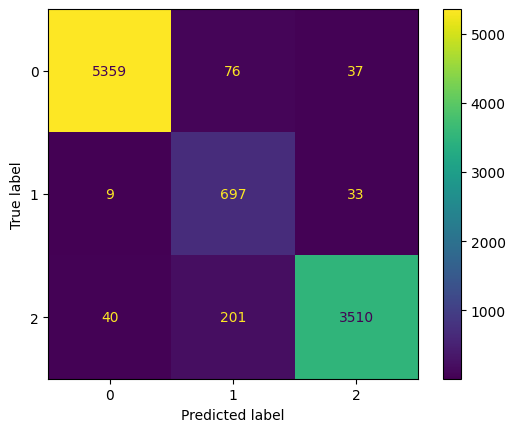

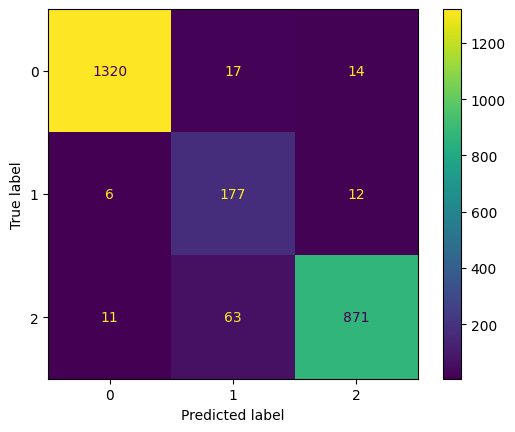

In [24]:
from sklearn.linear_model import LogisticRegression

param_grid={'penalty':['l1','l2',None],'C':[0.001,0.01,0.1,1,10]}

reg = GridSearchCV(LogisticRegression(max_iter=500),param_grid=param_grid)

reg.fit(X_train_sampled, y_train_sampled)

evaluate_classifier(reg,X_train,y_train,X_test,y_test)

In [97]:
# with open('models/regression_unsup.pkl','wb') as file:
#     pickle.dump(reg, file)

with open('models/regression_unsup.pkl','rb') as file:
    reg = pickle.load(file)

In [101]:
from sklearn.ensemble import RandomForestClassifier

param_grid={'n_estimators': [100,500], 'max_depth':[5,7,10], 'bootstrap':[True,False]}

rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)

rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 7, 10],
                         'n_estimators': [100, 500]})

In [102]:
rf.best_params_

{'bootstrap': False, 'max_depth': 10, 'n_estimators': 500}

In [103]:
evaluate_classifier(rf,X_train,y_train,X_test,y_test)

TRAIN PERFORMANCE


In [ ]:
len(df_human.columns)

100

In [ ]:
len(X_test.columns)

100

In [ ]:
def add_unsupervised_columns(data):
    text = data['proc_text']
    X = data.drop(columns=['model_unanimous','proc_text'], axis=1)
    y = data['model_unanimous']
    
    from sklearn.feature_extraction.text import TfidfVectorizer


    tfidf = TfidfVectorizer(analyzer='word'
                            , min_df=0.05
                            , stop_words='english')
    tfidf_wm = tfidf.fit_transform(text)
    tfidf_tokens = tfidf.get_feature_names_out()
    df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

    X = pd.concat([df_tfidfvect, X], axis=1)
    

    from sklearn.feature_selection import VarianceThreshold

    thresholder = VarianceThreshold()
    X_high_variance = thresholder.fit_transform(X)
    mask = thresholder.get_support(indices=True)
    feature_names_high_variance = X.columns[mask]
    X_high_variance = pd.DataFrame(X_high_variance, columns=feature_names_high_variance)



    print("X shape:", X.shape)
    print("X_high_variance shape:", X_high_variance.shape)
    
    return X_high_variance

In [ ]:
df_human_unsup=add_unsupervised_columns(df_human)



OTHER TEST PERFORMANCE
              precision    recall  f1-score   support

          PO       0.93      0.74      0.83       160
          PP       0.94      0.76      0.84        95
          UN       0.64      0.96      0.76        98

    accuracy                           0.81       353
   macro avg       0.83      0.82      0.81       353
weighted avg       0.85      0.81      0.81       353



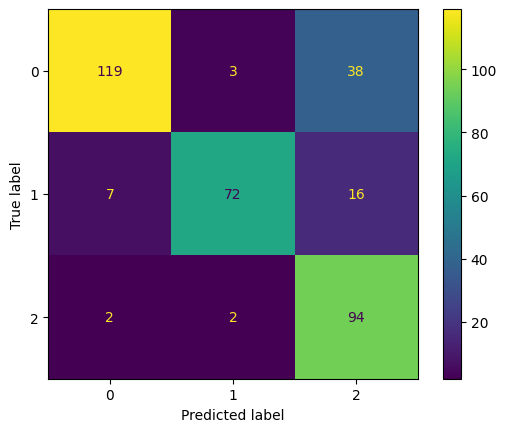

In [ ]:
print(f"\n\nOTHER TEST PERFORMANCE")
y_pred_test2=rf.predict(df_human_unsup)

print(classification_report(y_human,y_pred_test2))

conf_m=confusion_matrix(y_human,y_pred_test2)

ConfusionMatrixDisplay(conf_m).plot()

In [66]:
with open('models/rf_unsup.pkl','wb') as file:
    pickle.dump(rf, file)

with open('models/rf_unsup.pkl','rb') as file:
    reg = pickle.load(file)